# LOADING THE LIBRARIES

In [1]:
library(caret)
library(mlbench)
library(dplyr)
library(base)
library(caTools)
library(e1071)
library(ROCR)
library(Metrics)
library(ggplot2)
library(rpart)
library(randomForest)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'Metrics'

The following objects are masked from 'package:caret':

    precision, recall

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



# LOADING THE DATASET 

In [2]:
framingham <- read.csv("C:/Users/Praty/OneDrive/Desktop/h1.csv")
head(framingham)

X6,X148,X72,X35,X0,X33.6,X0.627,X50,X1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1


In [3]:
# DATA CLEANING AND DATA INFORMATION
summary(framingham)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

In [4]:
# checking the datatypes of variables
sapply(framingham, class)

age                  anaemia creatinine_phosphokinase 
               "numeric"                "integer"                "integer" 
                diabetes        ejection_fraction      high_blood_pressure 
               "integer"                "integer"                "integer" 
               platelets         serum_creatinine             serum_sodium 
               "numeric"                "numeric"                "integer" 
                     sex                  smoking                     time 
               "integer"                "integer"                "integer" 
             DEATH_EVENT 
               "integer"

In [5]:
# Finding the missing values in framingham dataset

is.na(framingham)
head(sum(is.na(framingham)))


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0

In [6]:
sum(framingham$DEATH_EVENT == 1)

[1] 96

In [7]:
sum(framingham$DEATH_EVENT == 0)

[1] 203

In [8]:
# list of columns with missing values
list_na = colnames(framingham[apply(framingham, 2, anyNA)])
list_na

character(0)

In [7]:
#taking median of of indiviual parameter which consists of missing values
missing = apply(framingham[,colnames(framingham)%in% list_na],2, mean, na.rm = TRUE)
missing


education   cigsPerDay       BPMeds      totChol          BMI    heartRate 
  1.97944377   9.00593683   0.02961548 236.69952267  25.80080076  75.87898089 
     glucose 
 81.96365524

In [8]:
#converting each parameter into a new varaiable so that it doesnt affect the orginal dataframe
df1 = framingham %>% mutate(education1 = ifelse(is.na(education), average_missing[1],education),
                            cigsPerDay1 = ifelse(is.na(cigsPerDay), average_missing[2],cigsPerDay),
                            BPMeds1 = ifelse(is.na(BPMeds), average_missing[3], BPMeds),
                            totChol1 = ifelse(is.na(totChol), average_missing[4],totChol),
                            BMI1 = ifelse(is.na(BMI), average_missing[5], BMI),
                            heartRate1 = ifelse(is.na(heartRate), average_missing[6], heartRate),
                            glucose1 = ifelse(is.na(glucose), average_missing[7],glucose))

In [9]:
#sum of missing values in individual parameters.
print("THE SUM OF MISSING VALUES BEFORE REPLACED BY MEDIAN MODE")
sum(is.na(df1$education))
sum(is.na(df1$cigsPerDay))
sum(is.na(df1$BPMeds))
sum(is.na(df1$totChol))
sum(is.na(df1$BMI))
sum(is.na(df1$heartRate))
sum(is.na(df1$glucose))

# new parameters with no missing values
print("THE SUM OF MISSING VALUES AFTER REPLACED BY MEDIAN MODE")
sum(is.na(df1$education1))
sum(is.na(df1$cigsPerDay1))
sum(is.na(df1$BPMeds1))
sum(is.na(df1$totChol1))
sum(is.na(df1$BMI1))
sum(is.na(df1$heartRate1))
sum(is.na(df1$glucose1))

[1] "THE SUM OF MISSING VALUES BEFORE REPLACED BY MEAN"


[1] 105

[1] 29

[1] 53

[1] 50

[1] 19

[1] 1

[1] 388

[1] "THE SUM OF MISSING VALUES AFTER REPLACED BY MEAN"


[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [10]:
# correlation matrix for the same
df1
round(df1, 3)

cor_matrix = cor(framingham, method = "pearson", use = "complete.obs")
cor_matrix

cor_matrix1 = cor(df1, method = "pearson", use = "complete.obs")
cor_matrix1

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,TenYearCHD,education1,cigsPerDay1,BPMeds1,totChol1,BMI1,heartRate1,glucose1
1,39,4,0,0,0,0,0,0,195,...,80,77,0,4,0,0,195,26.97,80,77.00000
0,46,2,0,0,0,0,0,0,250,...,95,76,0,2,0,0,250,28.73,95,76.00000
1,48,1,1,20,0,0,0,0,245,...,75,70,0,1,20,0,245,25.34,75,70.00000
0,61,3,1,30,0,0,1,0,225,...,65,103,1,3,30,0,225,28.58,65,103.00000
0,46,3,1,23,0,0,0,0,285,...,85,85,0,3,23,0,285,23.10,85,85.00000
0,43,2,0,0,0,0,1,0,228,...,77,99,0,2,0,0,228,30.30,77,99.00000
0,63,1,0,0,0,0,0,0,205,...,60,85,1,1,0,0,205,33.11,60,85.00000
0,45,2,1,20,0,0,0,0,313,...,79,78,0,2,20,0,313,21.68,79,78.00000
1,52,1,0,0,0,0,1,0,260,...,76,79,0,1,0,0,260,26.36,76,79.00000
1,43,1,1,30,0,0,1,0,225,...,93,88,0,1,30,0,225,23.61,93,88.00000


male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,TenYearCHD,education1,cigsPerDay1,BPMeds1,totChol1,BMI1,heartRate1,glucose1
1,39,4,0,0,0,0,0,0,195,...,80,77,0,4,0,0,195,26.97,80,77.000
0,46,2,0,0,0,0,0,0,250,...,95,76,0,2,0,0,250,28.73,95,76.000
1,48,1,1,20,0,0,0,0,245,...,75,70,0,1,20,0,245,25.34,75,70.000
0,61,3,1,30,0,0,1,0,225,...,65,103,1,3,30,0,225,28.58,65,103.000
0,46,3,1,23,0,0,0,0,285,...,85,85,0,3,23,0,285,23.10,85,85.000
0,43,2,0,0,0,0,1,0,228,...,77,99,0,2,0,0,228,30.30,77,99.000
0,63,1,0,0,0,0,0,0,205,...,60,85,1,1,0,0,205,33.11,60,85.000
0,45,2,1,20,0,0,0,0,313,...,79,78,0,2,20,0,313,21.68,79,78.000
1,52,1,0,0,0,0,1,0,260,...,76,79,0,1,0,0,260,26.36,76,79.000
1,43,1,1,30,0,0,1,0,225,...,93,88,0,1,30,0,225,23.61,93,88.000


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000000,-0.024411605,0.01772891,0.20611434,0.33032245,-0.05212402,-0.002311583,0.001424449,0.01381870,-0.07032113,-0.04535804,0.05187186,0.07311142,-0.115285413,0.002939977,0.09168837
age,-0.024411605,1.000000000,-0.15949856,-0.21077095,-0.18929528,0.13473173,0.050893365,0.306238736,0.10909159,0.26825160,0.38826667,0.20828288,0.13751110,-0.002722424,0.118349131,0.23398279
education,0.017728915,-0.159498556,1.00000000,0.02525101,0.01379008,-0.01373947,-0.030385945,-0.078827515,-0.03962675,-0.01352158,-0.12435978,-0.05805851,-0.13755494,-0.064214299,-0.031998340,-0.06327868
currentSmoker,0.206114344,-0.210770946,0.02525101,1.00000000,0.77391320,-0.05192328,-0.038149898,-0.108077888,-0.04184893,-0.05103410,-0.13442793,-0.11595511,-0.15982144,0.050841341,-0.053241532,0.01916493
cigsPerDay,0.330322451,-0.189295281,0.01379008,0.77391320,1.00000000,-0.04650399,-0.036285654,-0.070460320,-0.03696098,-0.03040036,-0.09478131,-0.05674568,-0.08739478,0.064030435,-0.053726433,0.05201379
BPMeds,-0.052124025,0.134731727,-0.01373947,-0.05192328,-0.04650399,1.00000000,0.113125161,0.262909532,0.04906635,0.09408260,0.27126283,0.19963002,0.10564166,0.012889347,0.054232300,0.08915158
prevalentStroke,-0.002311583,0.050893365,-0.03038595,-0.03814990,-0.03628565,0.11312516,1.000000000,0.066056922,0.00962541,0.01273642,0.06106955,0.05583364,0.03649635,-0.017018584,0.016061020,0.04836574
prevalentHyp,0.001424449,0.306238736,-0.07882751,-0.10807789,-0.07046032,0.26290953,0.066056922,1.000000000,0.08055606,0.16665497,0.69767494,0.61773444,0.30294917,0.146817901,0.086942130,0.18138714
diabetes,0.013818700,0.109091587,-0.03962675,-0.04184893,-0.03696098,0.04906635,0.009625410,0.080556056,1.00000000,0.04845146,0.10255213,0.05068619,0.08900859,0.060983597,0.614820317,0.09343079
totChol,-0.070321132,0.268251605,-0.01352158,-0.05103410,-0.03040036,0.09408260,0.012736423,0.166654968,0.04845146,1.00000000,0.21992459,0.17442197,0.12105645,0.093052845,0.049884451,0.09133805


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,TenYearCHD,education1,cigsPerDay1,BPMeds1,totChol1,BMI1,heartRate1,glucose1
male,1.000000000,-0.024411605,0.01772891,0.20611434,0.33032245,-0.05212402,-0.002311583,0.001424449,0.01381870,-0.07032113,...,-0.115285413,0.002939977,0.09168837,0.01772891,0.33032245,-0.05212402,-0.07032113,0.07311142,-0.115285413,0.002939977
age,-0.024411605,1.000000000,-0.15949856,-0.21077095,-0.18929528,0.13473173,0.050893365,0.306238736,0.10909159,0.26825160,...,-0.002722424,0.118349131,0.23398279,-0.15949856,-0.18929528,0.13473173,0.26825160,0.13751110,-0.002722424,0.118349131
education,0.017728915,-0.159498556,1.00000000,0.02525101,0.01379008,-0.01373947,-0.030385945,-0.078827515,-0.03962675,-0.01352158,...,-0.064214299,-0.031998340,-0.06327868,1.00000000,0.01379008,-0.01373947,-0.01352158,-0.13755494,-0.064214299,-0.031998340
currentSmoker,0.206114344,-0.210770946,0.02525101,1.00000000,0.77391320,-0.05192328,-0.038149898,-0.108077888,-0.04184893,-0.05103410,...,0.050841341,-0.053241532,0.01916493,0.02525101,0.77391320,-0.05192328,-0.05103410,-0.15982144,0.050841341,-0.053241532
cigsPerDay,0.330322451,-0.189295281,0.01379008,0.77391320,1.00000000,-0.04650399,-0.036285654,-0.070460320,-0.03696098,-0.03040036,...,0.064030435,-0.053726433,0.05201379,0.01379008,1.00000000,-0.04650399,-0.03040036,-0.08739478,0.064030435,-0.053726433
BPMeds,-0.052124025,0.134731727,-0.01373947,-0.05192328,-0.04650399,1.00000000,0.113125161,0.262909532,0.04906635,0.09408260,...,0.012889347,0.054232300,0.08915158,-0.01373947,-0.04650399,1.00000000,0.09408260,0.10564166,0.012889347,0.054232300
prevalentStroke,-0.002311583,0.050893365,-0.03038595,-0.03814990,-0.03628565,0.11312516,1.000000000,0.066056922,0.00962541,0.01273642,...,-0.017018584,0.016061020,0.04836574,-0.03038595,-0.03628565,0.11312516,0.01273642,0.03649635,-0.017018584,0.016061020
prevalentHyp,0.001424449,0.306238736,-0.07882751,-0.10807789,-0.07046032,0.26290953,0.066056922,1.000000000,0.08055606,0.16665497,...,0.146817901,0.086942130,0.18138714,-0.07882751,-0.07046032,0.26290953,0.16665497,0.30294917,0.146817901,0.086942130
diabetes,0.013818700,0.109091587,-0.03962675,-0.04184893,-0.03696098,0.04906635,0.009625410,0.080556056,1.00000000,0.04845146,...,0.060983597,0.614820317,0.09343079,-0.03962675,-0.03696098,0.04906635,0.04845146,0.08900859,0.060983597,0.614820317
totChol,-0.070321132,0.268251605,-0.01352158,-0.05103410,-0.03040036,0.09408260,0.012736423,0.166654968,0.04845146,1.00000000,...,0.093052845,0.049884451,0.09133805,-0.01352158,-0.03040036,0.09408260,1.00000000,0.12105645,0.093052845,0.049884451


Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."

glm variable importance

                Overall
age             9.64212
sysBP           4.93254
male            4.60032
glucose1        3.82028
cigsPerDay1     3.66528
prevalentStroke 2.81693
prevalentHyp    1.77100
BPMeds1         1.69776
diaBP           1.29207
diabetes        1.15398
totChol1        0.72686
heartRate1      0.39379
education1      0.33669
BMI1            0.16235
currentSmoker   0.00549


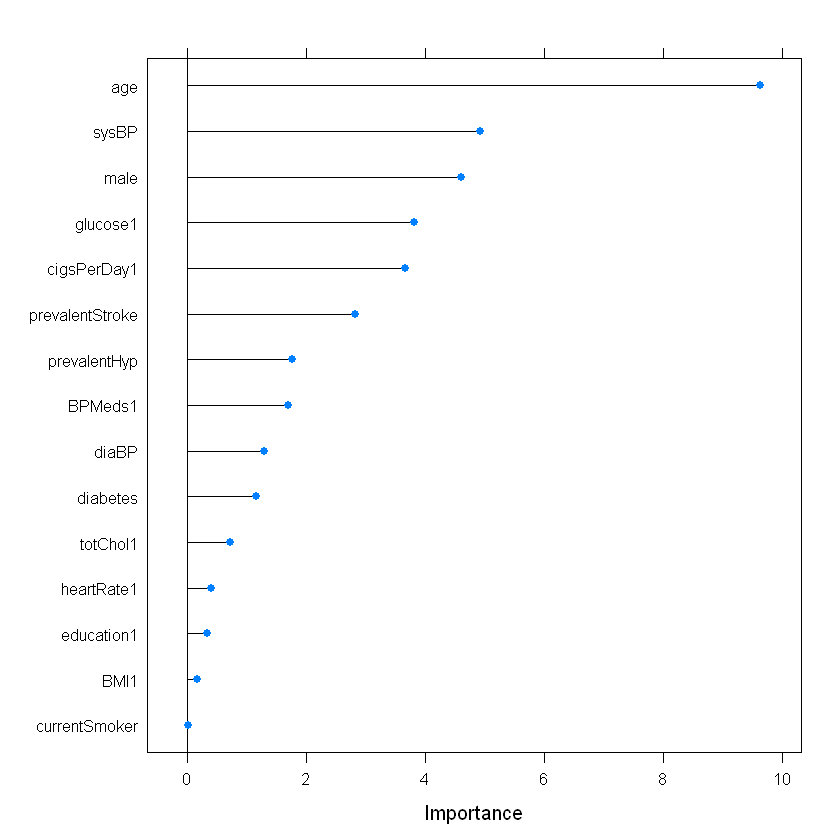

In [11]:
# checking the importanc of the parameters

rank_featuer = trainControl(method = "cv", number = 10)
model = train(TenYearCHD ~ male + age + education1 + currentSmoker + cigsPerDay1+BPMeds1 +prevalentStroke+
                prevalentHyp + diabetes + totChol1 + sysBP + diaBP + BMI1 + heartRate1 + glucose1,
              data=df1, method="glm", preProcess="scale", trControl=rank_featuer)

importance = varImp(model, scale =FALSE)
print(importance)
plot(importance)

In [12]:
# new data set
final_df = c("male","age","education1","currentSmoker","cigsPerDay1","BPMeds1","prevalentStroke"
             ,"prevalentHyp","diabetes","totChol1","sysBP","diaBP","BMI1","heartRate1","glucose1",
             "TenYearCHD")

framingham_df = df1[final_df]
head(framingham_df)

male,age,education1,currentSmoker,cigsPerDay1,BPMeds1,prevalentStroke,prevalentHyp,diabetes,totChol1,sysBP,diaBP,BMI1,heartRate1,glucose1,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [13]:
# again checking for missing values
list_na1 = colnames(framingham_df[apply(framingham_df, 2, anyNA)])
list_na1

character(0)

In [14]:
#rounding off the dataset
framingham_df_1 = round(framingham_df,digits = 2)
head(framingham_df_1)

male,age,education1,currentSmoker,cigsPerDay1,BPMeds1,prevalentStroke,prevalentHyp,diabetes,totChol1,sysBP,diaBP,BMI1,heartRate1,glucose1,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


# APPLYING MACHINE LEARNING MODELS

In [15]:
#applying models(k cross validation)
# SPLITTING THE DATA INTO TRAIN AND TEST DATA
Train = createDataPartition(framingham_df_1$TenYearCHD, p=0.8, list=FALSE)
train_data = framingham_df_1[Train,]
test_data = framingham_df_1[-Train,]

In [16]:
#train_data = subset(framingham_df_1, split == "TRUE")
#test_data = subset(framingham_df_1, split == "FALSE")

In [17]:
print("TRAIN DATA")
head(train_data)
print("TEST DATA")
head(test_data)

[1] "TRAIN DATA"


,male,age,education1,currentSmoker,cigsPerDay1,BPMeds1,prevalentStroke,prevalentHyp,diabetes,totChol1,sysBP,diaBP,BMI1,heartRate1,glucose1,TenYearCHD
1,1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
4,0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130,84,23.10,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180,110,30.30,77,99,0
7,0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1


[1] "TEST DATA"


,male,age,education1,currentSmoker,cigsPerDay1,BPMeds1,prevalentStroke,prevalentHyp,diabetes,totChol1,sysBP,diaBP,BMI1,heartRate1,glucose1,TenYearCHD
3,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
9,1,52,1,0,0,0,0,1,0,260,141.5,89.0,26.36,76,79,0
17,1,48,3,1,10,0,0,1,0,232,138.0,90.0,22.37,64,72,0
23,0,52,1,0,0,0,0,0,0,234,148.0,78.0,34.17,70,113,0
29,0,61,3,0,0,0,0,1,0,272,182.0,121.0,32.80,85,65,1
36,1,37,2,0,0,0,0,1,0,225,124.5,92.5,38.53,95,83,0


# LOGISTIC REGRESSION (with k-folds)

In [18]:
# DEFINING THE K-FOLD PARAMETER
control1 = trainControl(method = 'repeatedcv',number = 10,
                        repeats = 3,savePredictions = "all")
# TRAINING THE LOGISTIC REGRESSION MODEL.
glmModel = train(factor(TenYearCHD)~., data = train_data, 
                 method='glm',family='binomial', trControl = control1)

In [19]:
summary(glmModel)                                                            


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8426  -0.5874  -0.4266  -0.2880   2.7470  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -7.8326417  0.7500288 -10.443  < 2e-16 ***
male             0.5725754  0.1131332   5.061 4.17e-07 ***
age              0.0635140  0.0070347   9.029  < 2e-16 ***
education1      -0.0178258  0.0517512  -0.344  0.73051    
currentSmoker   -0.0051123  0.1611982  -0.032  0.97470    
cigsPerDay1      0.0208557  0.0063960   3.261  0.00111 ** 
BPMeds1          0.4562672  0.2421851   1.884  0.05957 .  
prevalentStroke  1.5057854  0.5544322   2.716  0.00661 ** 
prevalentHyp     0.2226688  0.1461087   1.524  0.12751    
diabetes         0.4470954  0.3312989   1.350  0.17717    
totChol1         0.0019284  0.0011809   1.633  0.10249    
sysBP            0.0127621  0.0040975   3.115  0.00184 ** 
diaBP           -0.0006202  0.0068867  -0.090  0.92825    
BMI1            -0.0128346  0.013

In [20]:
print(glmModel)

Generalized Linear Model 

3392 samples
  15 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3053, 3052, 3053, 3052, 3052, 3053, ... 
Resampling results:

  Accuracy   Kappa    
  0.8570178  0.1194394



In [21]:
predictTest = predict(glmModel, newdata = test_data)

[1] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[112] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

In [22]:
cf1 = confusionMatrix(predictTest, factor(test_data$TenYearCHD), mode = 'everything')

In [23]:
cf1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 705 128
         1   8   7
                                          
               Accuracy : 0.8396          
                 95% CI : (0.8132, 0.8637)
    No Information Rate : 0.8408          
    P-Value [Acc > NIR] : 0.5601          
                                          
                  Kappa : 0.0635          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.98878         
            Specificity : 0.05185         
         Pos Pred Value : 0.84634         
         Neg Pred Value : 0.46667         
              Precision : 0.84634         
                 Recall : 0.98878         
                     F1 : 0.91203         
             Prevalence : 0.84080         
         Detection Rate : 0.83137         
   Detection Prevalence : 0.98231         
      Balanced Accuracy : 0.52

# DECISION TREES

In [24]:
control2 = trainControl(method = 'repeatedcv',number = 10,repeats = 3, returnResamp = "all",savePredictions = "all")

decisionTreeModel = train(factor(TenYearCHD)~., data = train_data, method="rpart", parms = list(split = "information"),
                         trControl =control2 ,tuneLength=10)

In [25]:
summary(decisionTreeModel)

Call:
(function (formula, data, weights, subset, na.action = na.rpart, 
    method, model = FALSE, x = FALSE, y = TRUE, parms, control, 
    cost, ...) 
{
    Call <- match.call()
    if (is.data.frame(model)) {
        m <- model
        model <- FALSE
    }
    else {
        indx <- match(c("formula", "data", "weights", "subset"), 
            names(Call), nomatch = 0)
        if (indx[1] == 0) 
            stop("a 'formula' argument is required")
        temp <- Call[c(1, indx)]
        temp$na.action <- na.action
        temp[[1]] <- quote(stats::model.frame)
        m <- eval.parent(temp)
    }
    Terms <- attr(m, "terms")
    if (any(attr(Terms, "order") > 1)) 
        stop("Trees cannot handle interaction terms")
    Y <- model.response(m)
    wt <- model.weights(m)
    if (any(wt < 0)) 
        stop("negative weights not allowed")
    if (!length(wt)) 
        wt <- rep(1, nrow(m))
    offset <- model.offset(m)
    X <- rpart.matrix(m)
    nobs <- nrow(X)
    nvar <- ncol(X)


In [26]:
print(decisionTreeModel)

CART 

3392 samples
  15 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3052, 3053, 3053, 3053, 3053, 3053, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa      
  0.001964637  0.8248824  0.124590314
  0.002619515  0.8335289  0.125081948
  0.002946955  0.8350047  0.113904119
  0.003710980  0.8399183  0.106475110
  0.003929273  0.8412946  0.106275582
  0.004911591  0.8433598  0.095371548
  0.005893910  0.8461092  0.075447471
  0.006385069  0.8459143  0.048920230
  0.006548788  0.8460126  0.047347712
  0.008644401  0.8494503  0.008835733

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.008644401.


In [27]:
predictTest1 = predict(decisionTreeModel,newdata=test_data)

In [28]:
cf2 = confusionMatrix(predictTest1,reference = factor(test_data$TenYearCHD),mode = 'everything')

In [29]:
cf2

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 713 135
         1   0   0
                                          
               Accuracy : 0.8408          
                 95% CI : (0.8144, 0.8648)
    No Information Rate : 0.8408          
    P-Value [Acc > NIR] : 0.523           
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8408          
         Neg Pred Value :    NaN          
              Precision : 0.8408          
                 Recall : 1.0000          
                     F1 : 0.9135          
             Prevalence : 0.8408          
         Detection Rate : 0.8408          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.50

# SUPPORT VECTOR MACHINE

In [30]:
control4 = trainControl(method = 'repeatedcv',number = 10,repeats = 3,savePredictions = "all")

SVMModel = train(factor(TenYearCHD)~., data = train_data, method="svmLinear",trControl =  control4)

In [31]:
print(SVMModel)

Support Vector Machines with Linear Kernel 

3392 samples
  15 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3052, 3053, 3053, 3052, 3053, 3053, ... 
Resampling results:

  Accuracy   Kappa     
  0.8494501  0.01344189

Tuning parameter 'C' was held constant at a value of 1


In [32]:
summary(SVMModel)

Length  Class   Mode 
     1   ksvm     S4 

In [33]:
predictTest3 = predict(SVMModel,newdata = test_data)

In [34]:
cf4 = confusionMatrix(predictTest3,reference = factor(test_data$TenYearCHD),mode = 'everything')
cf4

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 706 133
         1   7   2
                                          
               Accuracy : 0.8349          
                 95% CI : (0.8082, 0.8593)
    No Information Rate : 0.8408          
    P-Value [Acc > NIR] : 0.6999          
                                          
                  Kappa : 0.008           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99018         
            Specificity : 0.01481         
         Pos Pred Value : 0.84148         
         Neg Pred Value : 0.22222         
              Precision : 0.84148         
                 Recall : 0.99018         
                     F1 : 0.90979         
             Prevalence : 0.84080         
         Detection Rate : 0.83255         
   Detection Prevalence : 0.98939         
      Balanced Accuracy : 0.50

# XGBOOST

In [ ]:
control6 = trainControl(method = 'repeatedcv',number = 10,repeats = 3, returnResamp = "all",savePredictions = "all")

XGBoost = train(factor(TenYearCHD)~., data = train_data , method="xgbLinear", 
                      trControl =control6,verbose = FALSE)

In [36]:
summary(XGBoost)

              Length Class              Mode       
handle             1 xgb.Booster.handle externalptr
raw           116828 -none-             raw        
niter              1 -none-             numeric    
call               6 -none-             call       
params             4 -none-             list       
callbacks          0 -none-             list       
feature_names     15 -none-             character  
nfeatures          1 -none-             numeric    
xNames            15 -none-             character  
problemType        1 -none-             character  
tuneValue          4 data.frame         list       
obsLevels          2 -none-             character  
param              1 -none-             list       

In [37]:
print(XGBoost)

eXtreme Gradient Boosting 

3392 samples
  15 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3052, 3052, 3053, 3053, 3053, 3053, ... 
Resampling results across tuning parameters:

  lambda  alpha  nrounds  Accuracy   Kappa    
  0e+00   0e+00   50      0.8362833  0.1231833
  0e+00   0e+00  100      0.8323522  0.1231408
  0e+00   0e+00  150      0.8306800  0.1202856
  0e+00   1e-04   50      0.8357908  0.1158673
  0e+00   1e-04  100      0.8305785  0.1193392
  0e+00   1e-04  150      0.8276298  0.1119100
  0e+00   1e-01   50      0.8355938  0.1226326
  0e+00   1e-01  100      0.8333355  0.1177005
  0e+00   1e-01  150      0.8312685  0.1154311
  1e-04   0e+00   50      0.8359874  0.1202437
  1e-04   0e+00  100      0.8318571  0.1247629
  1e-04   0e+00  150      0.8289095  0.1136324
  1e-04   1e-04   50      0.8361829  0.1223566
  1e-04   1e-04  100      0.8301889  0.1145932
  1e-04   1e-04  150      0

In [38]:
predictTest5 = predict(XGBoost, newdata = test_data)

In [39]:
cf6 = confusionMatrix(predictTest5,reference = factor(test_data$TenYearCHD),mode = 'everything')
cf6

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 686 125
         1  27  10
                                         
               Accuracy : 0.8208         
                 95% CI : (0.7932, 0.846)
    No Information Rate : 0.8408         
    P-Value [Acc > NIR] : 0.948          
                                         
                  Kappa : 0.0513         
                                         
 Mcnemar's Test P-Value : 3.611e-15      
                                         
            Sensitivity : 0.96213        
            Specificity : 0.07407        
         Pos Pred Value : 0.84587        
         Neg Pred Value : 0.27027        
              Precision : 0.84587        
                 Recall : 0.96213        
                     F1 : 0.90026        
             Prevalence : 0.84080        
         Detection Rate : 0.80896        
   Detection Prevalence : 0.95637        
      Balanced Accuracy : 0.51810        
        

# GRADIENT BOOSTING

In [40]:
control5 = trainControl(method = 'repeatedcv',number = 10,repeats = 3, returnResamp = "all",savePredictions = "all")

GradientBoost = train(factor(TenYearCHD)~., data = train_data , method="gbm", 
                 trControl =control5,verbose = FALSE)


,var,rel.inf
age,age,33.0340516
sysBP,sysBP,17.7589663
glucose1,glucose1,11.2701585
male,male,8.5181655
diaBP,diaBP,6.5338695
cigsPerDay1,cigsPerDay1,6.4151273
totChol1,totChol1,4.9477639
BMI1,BMI1,2.8598063
BPMeds1,BPMeds1,2.3437894
heartRate1,heartRate1,2.2396271


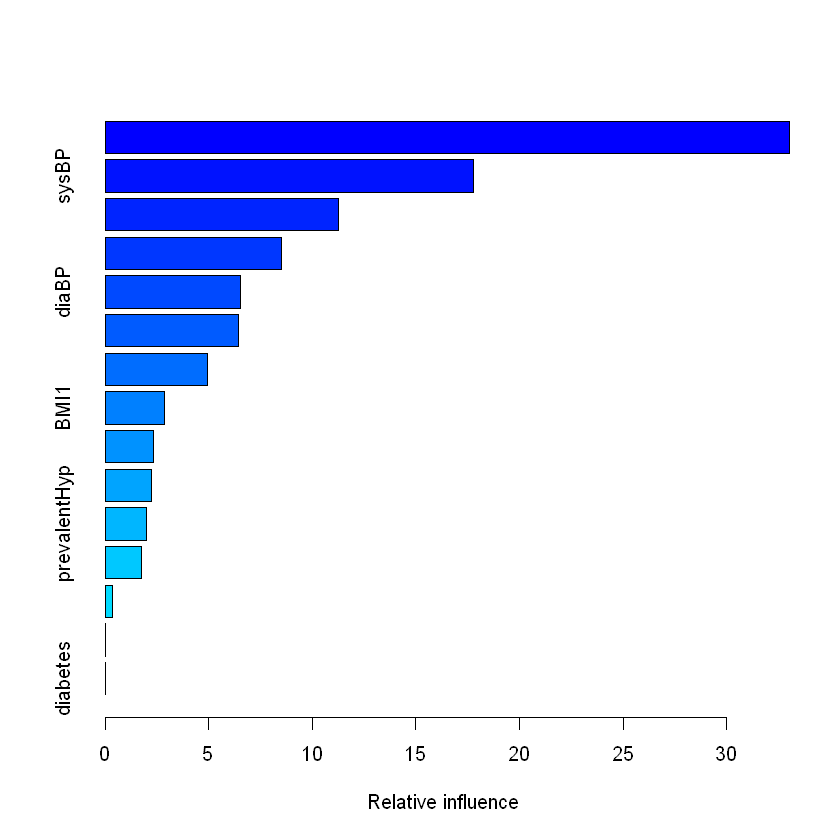

In [41]:
summary(GradientBoost)

In [42]:
print(GradientBoost)

Stochastic Gradient Boosting 

3392 samples
  15 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3053, 3052, 3053, 3053, 3053, 3054, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa     
  1                   50      0.8514151  0.04064384
  1                  100      0.8523975  0.08478472
  1                  150      0.8527900  0.10026564
  2                   50      0.8532825  0.08354912
  2                  100      0.8510235  0.09960171
  2                  150      0.8498407  0.10954429
  3                   50      0.8509234  0.09602328
  3                  100      0.8506288  0.12546170
  3                  150      0.8486630  0.12600272

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
Th

In [43]:
predictTest4 = predict(GradientBoost, newdata = test_data )

In [44]:
cf5 = confusionMatrix(predictTest4,reference = factor(test_data$TenYearCHD),mode = 'everything')
cf5

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 709 129
         1   4   6
                                         
               Accuracy : 0.8432         
                 95% CI : (0.8169, 0.867)
    No Information Rate : 0.8408         
    P-Value [Acc > NIR] : 0.4482         
                                         
                  Kappa : 0.0622         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.99439        
            Specificity : 0.04444        
         Pos Pred Value : 0.84606        
         Neg Pred Value : 0.60000        
              Precision : 0.84606        
                 Recall : 0.99439        
                     F1 : 0.91425        
             Prevalence : 0.84080        
         Detection Rate : 0.83608        
   Detection Prevalence : 0.98821        
      Balanced Accuracy : 0.51942        
        

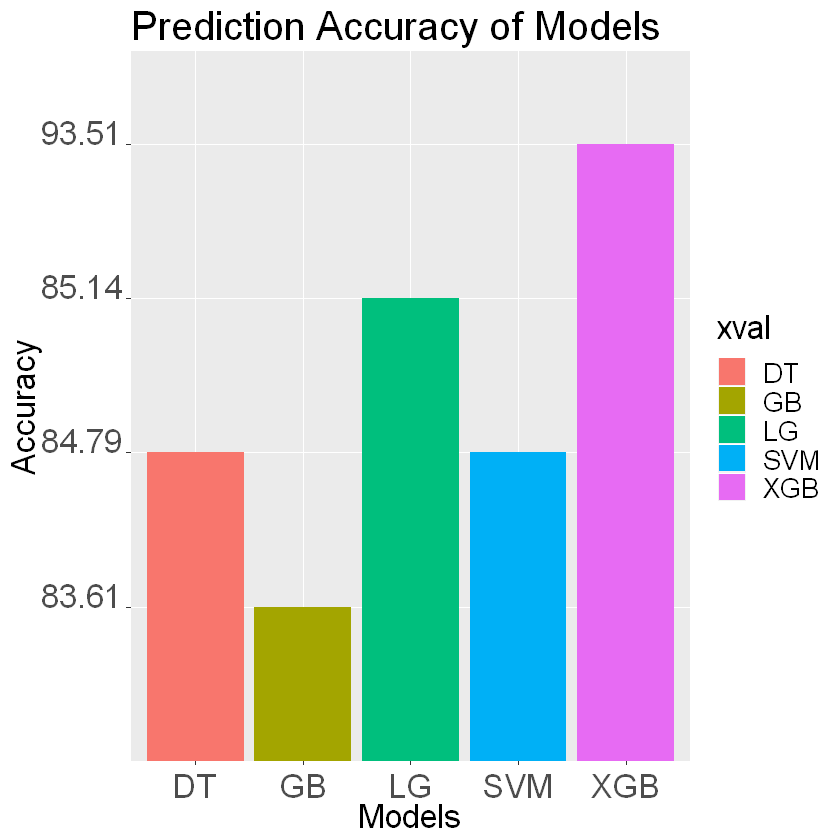

In [45]:
xval<-c("LG","DT","SVM","GB","XGB")
yval<-c(85.14,84.79,84.79,83.61,93.51)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Accuracy",title="Prediction Accuracy of Models")+
  theme(text = element_text(size=20),axis.text.x = element_text(angle = 0, vjust = 0, hjust=0.5,size=20),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=20))

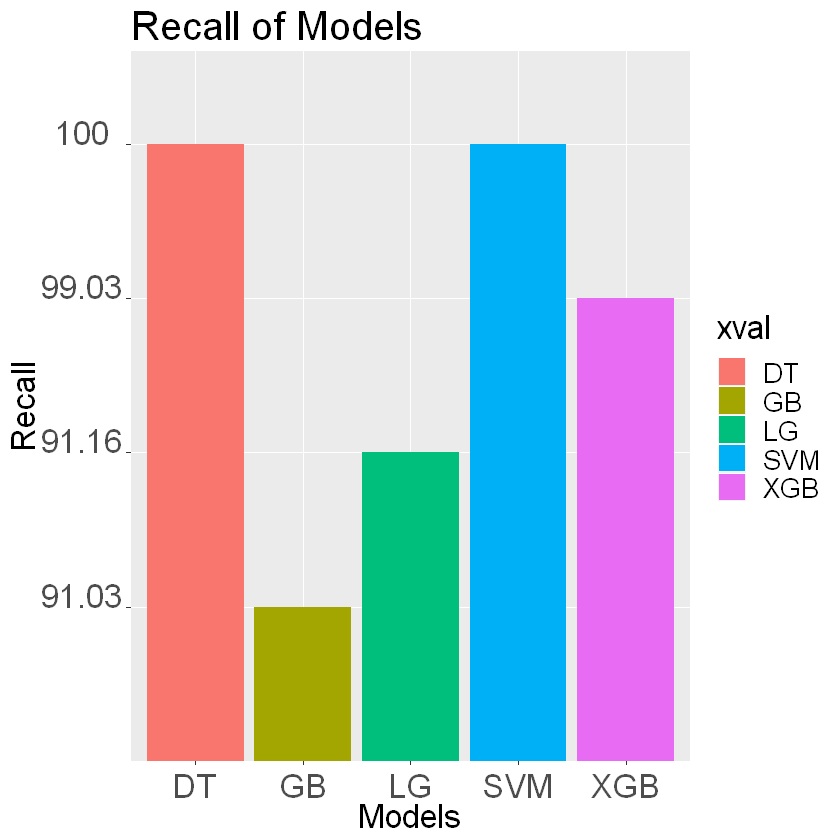

In [46]:
xval<-c("LG","DT","SVM","GB","XGB")
yval<-c(91.16,100.0,100.0,91.03,99.03)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Recall",title="Recall of Models")+
  theme(text = element_text(size=20),axis.text.x = element_text(angle = 0, vjust = 0, hjust=0.5,size=20),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=20))


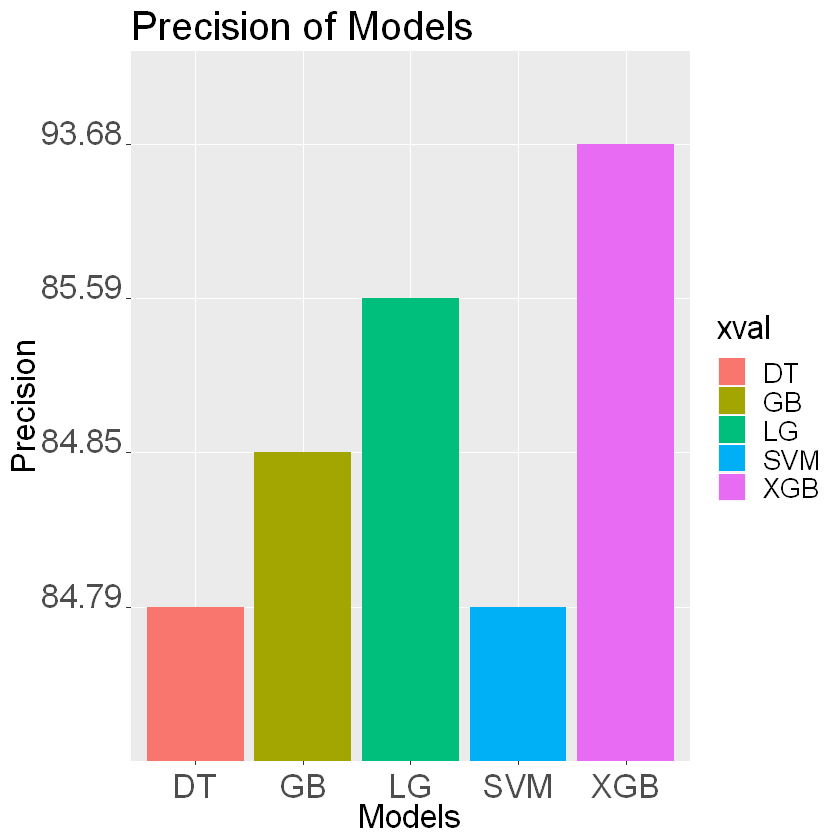

In [47]:
xval<-c("LG","DT","SVM","GB","XGB")
yval<-c(85.59,84.79,84.79,84.85,93.68)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Precision",title="Precision of Models")+
  theme(text = element_text(size=20),axis.text.x = element_text(angle = 0, vjust = 0, hjust=0.5,size=20),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=20))


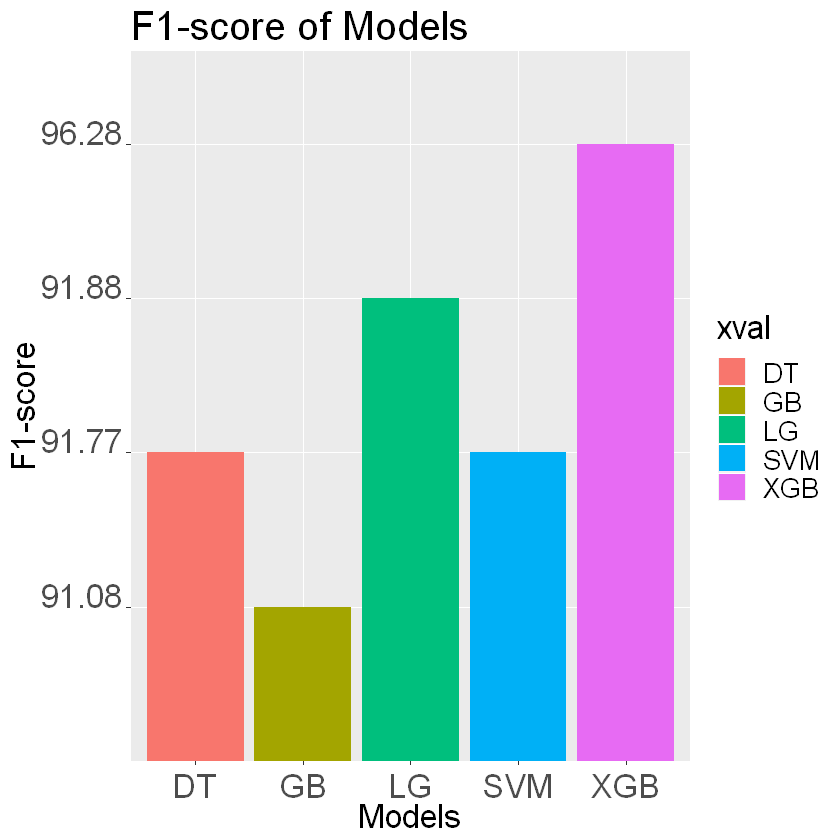

In [48]:
xval<-c("LG","DT","SVM","GB","XGB")
yval<-c(91.88, 91.77, 91.77, 91.08, 96.28)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="F1-score",title="F1-score of Models")+
  theme(text = element_text(size=20),axis.text.x = element_text(angle = 0, vjust = 0, hjust=0.5,size=20),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=20))


In [1]:
# APPLYTING ALL MODELS

In [2]:
skewness(framingham_df_1$TenYearCHD)

ERROR: Error in skewness(framingham_df_1$TenYearCHD): could not find function "skewness"


In [ ]:
# CLeaning and Filtering the dataset


In [ ]:
# DEFINING THE K-FOLD PARAMETER
control = trainControl(method = 'repeatedcv',number = 10,
                        repeats = 3,savePredictions = "all")

# TRAINING LOGISTIC REGRESSION (LR) MODEL.
glmModel = train(factor(TenYearCHD)~., data = train_data, 
                 method='glm',family='binomial', trControl = control)

# TRAINING SUPPORT VECTOR MACHINE (SVM) MODEL.
SVMModel = train(factor(TenYearCHD)~., data = train_data, method="svmLinear",
                 trControl =  control)

# TRAINING DECISION TREE (DT) MODEL.
decisionTreeModel = train(factor(TenYearCHD)~., data = train_data, 
                          method="rpart", parms = list(split = "information"),
                          trControl =control ,tuneLength=10)

# TRAINING GRADIENT BOOSTING (GB) MODEL.
GradientBoost = train(factor(TenYearCHD)~., data = train_data , method="gbm", 
                      trControl =control, verbose = FALSE)

# TRAINING EXTREME GRADIENT BOOSTING (XGBOOST) MODEL.
XGBoost = train(factor(TenYearCHD)~., data = train_data , method="xgbLinear", 
                trControl =control, verbose = FALSE)

#PREDICT FUNCTION

# LG PREDICT FUNCTION
predictTest1 = predict(glmModel, newdata=test_data)

# SVM PREDICT FUNCTION
predictTest2 = predict(SVMModel, newdata = test_data)

# DECISION TREE PREDICT FUNCTION
predictTest3 = predict(decisionTreeModel, newdata=test_data)

# GRADIENT BOOSTING PREDICT FUNCTION
predictTest4 = predict(GradientBoost, newdata = test_data )

# EXTREME GRADIENT BOOSTING PREDICT FUNCTION
predictTest5 = predict(XGBoost, newdata = test_data)


In [2]:
# CONFUSION MATRIX

# LG 
confusionMatrix(predictTest1, reference = factor(test_data$TenYearCHD), 
                mode = 'everything')

# SVM 
confusionMatrix(predictTest2, reference = factor(test_data$TenYearCHD), 
                mode = 'everything')

# DECISION TREE
confusionMatrix(predictTest3, reference = factor(test_data$TenYearCHD), 
                mode = 'everything')
  
# GRADIENT BOOSTING
confusionMatrix(predictTest4, reference = factor(test_data$TenYearCHD), 
                mode = 'everything')

# EXTREME GRADIENT BOOSTING
confusionMatrix(predictTest5, reference = factor(test_data$TenYearCHD), 
                mode = 'everything')
